# Plotting with Matplotlib

[Matplotlib](https://matplotlib.org/stable/) emulates the plotting capabilities of MATLAB (read about the history [here](https://matplotlib.org/stable/project/history.html)) and provides the most tried-and-tested way to produce publication-quality plots from in iPython notebooks.

We will use Matplotlib extensively in this class to plot solutions and examine results. FloPy's plotting utilities also heavily rely on the underlying Matplotlib module.

This notebook uses some material from a notebook developed by J.R. Johansson (jrjohansson@gmail.com - http://jrjohansson.github.io)



## Learning Objectives

After you have completed running and reading this notebook, you should be able to:
* Work with objects such as figures and axis handles
* Produce plots of appropriate 1-D (variable vs. x) and 2-D (variable vs. x and y) datasets
* Modify plot elements and styles to enhance a plot's usefulness
* Export plots for later use

# Initial Setup

In [1]:
#When working with files, it is always a good idea to import os, which allows you to be computer-agnostic
import os

#To create basic animations (by repeatedly changing a figure), these internal subroutines of iPython must be imported
from IPython.display import clear_output, display

#Any type of plot that involves matrices will end up needing NumPy
import numpy as np
#Import the plotting libraries of Matplotlib (the most commonly used routines)
import matplotlib.pyplot as plt

# Figures and Axes

A plot consists of a "figure", the container that contains all graphics, as well as one or more axes on which one or more plots are produced. The diagram below, taken from the Matplotlib website, shows functions used to create or edit different parts of a plot.

<img src="./doc_materials/matplotlib_anatomy.png" width="500px"/>

## Creating figure and axis objects

The first step in any figure creation is to create a figure object. Within the figure object you can create one or more axes, and within each axes you can add one or more dataseries or types of plots. The example below shows common setup steps that are used to place axes and add labels.

When you create a figure, axis, or plot within an axis, it is always a good idea to name them as objects so that you can address them later.
* For figures, use `figobj = plt.figure()` to be able to address `figobj`
* For axes, use `axisobj = figobj.add_axes()` to be able to address `axisobj`
* For plot elements within axes, use the `label` property as a name for legends

Text(0, 0.5, 'x')

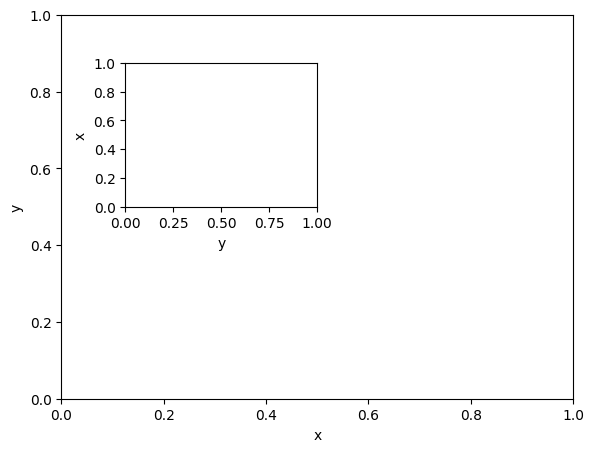

In [2]:
#Address the figure object as "fig"
fig = plt.figure()

#Address the axes as "axes".
#The format here is left, bottom, width, height, all provided as a percentage of the total figure size
#We create two separate axes first.
axis1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # main axes
axis2 = fig.add_axes([0.2, 0.5, 0.3, 0.3])  # inset axes
axis1.set_xlabel("x")
axis1.set_ylabel("y")
axis2.set_xlabel("y")
axis2.set_ylabel("x")

## Arrays of Axes

A common case of using multiple axes is to divide a figure up into multiple equally-sized subplots. The command `fig, axes = plt.subplots(...)` provides a way to quickly set this up. In this case, the object `axes` is an array of handles to each of the axes.

The method `fig.tight_layout()` arranges all axes so that there is no overlapping content

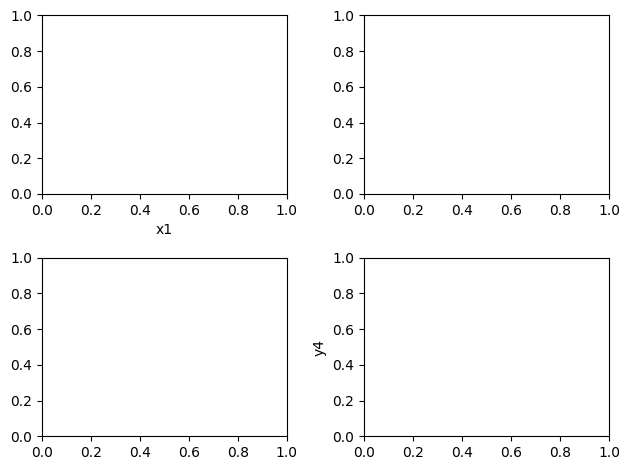

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0,0].set_xlabel('x1')
axes[1,1].set_ylabel('y4')

fig.tight_layout()

# 1-D Plots

The example below shows how to place a standard line plot within different axes, and add legends for all plot elements

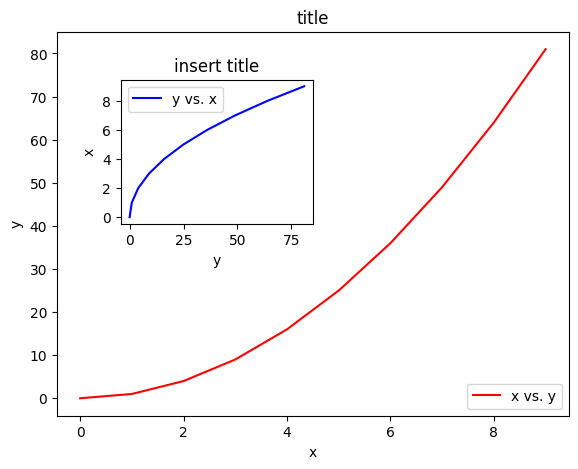

In [4]:
#Address the figure object as "fig"
fig = plt.figure()

#The variables we want to plot
x = np.arange(10)
y = x**2

#Address the axes as "axes".
#The format here is left, bottom, width, height, all provided as a percentage of the total figure size
#We create two separate axes first.
axis1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # main axes
axis2 = fig.add_axes([0.2, 0.5, 0.3, 0.3])  # inset axes

# Main axes - Add the plot and update axes properties
axis1.plot(x, y, "r",label="x vs. y")
axis1.set_xlabel("x")
axis1.set_ylabel("y")
axis1.set_title("title")
axis1.legend(loc='lower right')

# Inset axes - Add the plot and update the axes properties
axis2.plot(y, x, color="blue", label="y vs. x")
axis2.set_xlabel("y")
axis2.set_ylabel("x")
axis2.set_title("insert title");
axis2.legend(['y vs. x'],loc='upper left')

## Other plot types within axes

There are many useful methods for plotting different types of data using Matplotlib. The code below demonstrates a few of these. For a complete listing of all plot types, see [the Matplotlib Plot Types page](https://matplotlib.org/stable/plot_types/).

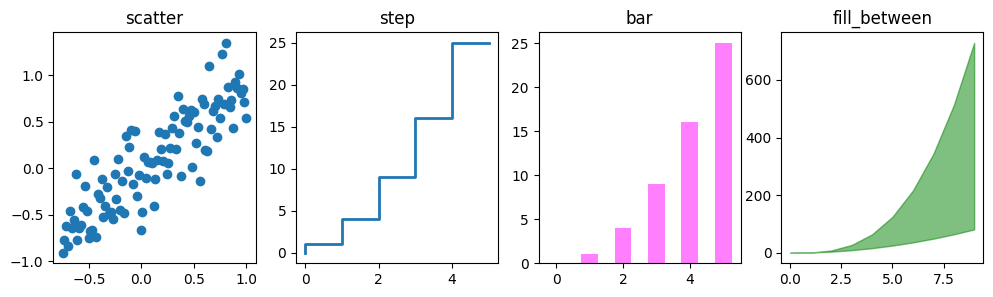

In [5]:
xx = np.linspace(-0.75, 1.0, 100)
n = np.array([0, 1, 2, 3, 4, 5])

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].scatter(xx, xx + 0.25 * np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, color="#ff00ff", alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5)
axes[3].set_title("fill_between");

## Tailoring plot visuals and Exporting

As seen above, different options can be used to set the scale of the figure, the properties of axes, and  how a plot element will appear (such as the color, marker style, line width, etc.). There are multiple ways to do this and different coders like different approaches.

**Tailoring Figures**: Setting figure properties is easiest (and most often done) at the time of `figobj` creation. Use Shift-Tab within the `plt.figure()` command to see potential options. Otherwise, `fig.set_*` commands can be used to set individual properties.

**Tailoring Axes**: Setting axis options tends to be iterative and is often done after `axisobj` creation, using `ax.set_*` commands.

**Tailoring Plot Elements**: Setting how a plot element (line, bar graph, etc.) displays is usually done at the time of plot element creation, as shown in the examples above

The examples below demonstrate a few of the methods and variables that can be used to set plot and axis properties. To explore further options in greater depth, choose one of the functions used below and use `Shift-Tab` to see properties that may be set, or use tab completion on any of the objects to see associated methods.

When you have created your first professionally-tailored plot, you'll probably want to export it and share it with friends (or your journal editor). This is easy using a figure object's `savefig` method.

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cardiff/Pythonworking/Hydro724/GWFlow-Modeling-Activities/nboutput/myprettyfig.png'

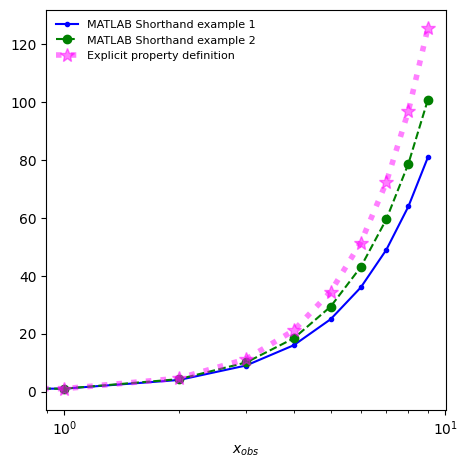

In [6]:
#Create a figure, specifying the size at time of creation
fig = plt.figure(figsize=(5,5), dpi=100)
#Post-hoc setting of figure properties (less common)
#fig.set_dpi(300)

#Create an axes, specifying options at time of creation
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],xlabel="$x_{obs}$",xscale="log")
#Post-hoc setting of axis properties (more common)
#ax.grid(visible=True)
#ax.set_yscale("log")
#ax.set_xlim(2,10)

#A series of characters can be used to specify color, marker type, and line type for basic operations
ax.plot(x, x**2, "b.-",label="MATLAB Shorthand example 1")
ax.plot(x, x**2.1, "go--",label="MATLAB Shorthand example 2")

#For more granular changes, different properties can be used to control the display of a plot object
#explicitly.
pl = ax.plot(
    x,
    x**2.2, 
    color="#ff00ff", 
    linewidth=4, 
    linestyle=":", 
    marker="*", 
    markersize=10, 
    alpha=0.5,
    label="Explicit property definition"
)

#Legend properties are generally set at legend creation
ax.legend(fontsize=8,frameon=False)

#Post-hoc setting of plot object properties.
#If a variable is declared when the plot is created, that variable may contain an array of objects 
#where properties for each object can be set. This tends to be more cumbersome.
#Try the examples below
#pl[0].set_color('g')
#pl[0].set_alpha(0.2)

output_name = os.path.join('.','nboutput','myprettyfig.png')
fig.savefig(output_name)

# 2-D Plots

Creating 2-D plots requires first setting up a 2-D `meshgrid` of points in (x,y) at which to calculate a function, and then evaluating the function over all x,y points.

## Plotting 2-D Scalar fields

Most 2-D plots for visualizing field variables rely on a colormap to convey information about the function's value. See the [Matplotlib documentation on different colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) for help with finding a colormap for your application. Named colormaps can be looked up under `plt.cm.`.

An alternative to mapping field variables is to use a rendered 3-D plot, though the detail visible in this plot will depend on arbitrary choices such as the camera angle. Matplotlib support exists for some 3-D plot types, but in current experience it is more buggy than 2-D plot types.

In [ ]:
#Setup the "mesh" of points on which to evaluate a function
xl = np.linspace(0, 2 * np.pi, 100)
yl = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(xl,yl)

#Evaluate the function Z at all points in the mesh
alpha = 0.7
phi_ext = 2 * np.pi * 0.5
Z = 2 + alpha - 2*np.cos(Y)*np.cos(X) - alpha * np.cos(phi_ext - 2 * Y)

#Demonstration of the pcolor plot type
fig1, ax1 = plt.subplots()
p = ax1.pcolor(
    X,
    Y,
    Z,
    cmap=plt.cm.RdBu,
    vmin=Z.min(),
    vmax=Z.max(),
)
cb = fig1.colorbar(p, ax=ax1)
ax1.set_title('plot_surface')

#Demonstration of the contour plot type
fig2, ax2 = plt.subplots()
cn = plt.contour(
    X,
    Y,
    Z,
    cmap=plt.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
)
ax2.clabel(cn)
cb = fig2.colorbar(cn, ax=ax2)
ax2.set_title('contour')

#Demonstration of the 3-D plot_surface plot type
fig3, ax3 = plt.subplots(subplot_kw={"projection": "3d"})
ax3.plot_surface(X, Y, Z, cmap=plt.cm.RdBu)
ax3.set_title('plot_surface')

## Plotting 2-D Vector Fields

As described in the Math Preliminaries, vector field variables represent a vector quantity that changes with space. For example, the gradient (the direction and rate of steepest ascent) of the surface plotted above changes with location. 

Vector fields can be plotted using the `quiver` statement. Do demonstrate this capability, we plot the surface from the prior example as a contour map and the calculated gradient as a quiver plot. Note that lines of equal value (contours) are perpendicular to the quiver arrows, when plotted with equal scaling for the x and y axes

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cn = plt.contour(
    X,
    Y,
    Z,
    cmap=plt.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
)
ax.clabel(cn)
cb = fig.colorbar(cn, ax=ax)

nq = 30
xq = np.linspace(0, 2*np.pi, nq)
yq = np.linspace(0, 2*np.pi, nq)
XQ, YQ = np.meshgrid(xq,yq)

DZDX = 2*np.cos(YQ)*np.sin(XQ)
DZDY = 2*np.sin(YQ)*np.cos(XQ) - 2*alpha*np.sin(phi_ext - 2*YQ)

ax.quiver(XQ,YQ,DZDX,DZDY)
ax.set_aspect('equal')
ax.set_title('Contour with quiver for gradient')

# Check-in Activity

In the coming weeks we will look at a few analytical solutions to the groundwater flow equation and demonstrate how they can produce some insights for testing and verifying our numerical models.

One such 2-D solution to the groundwater flow equation in a confined aquifer is:

$h(x,y) = \frac{Q}{4 \pi T} ln \left( \sqrt{(x - 10)^2 + y^2} \right) - R_x x + h_0$

where $x$,$y$ and $h$ have units of $[m]$, Q has units of $[m^3/s]$, T has units of $[m^2/s]$, $R_x$ is unitless, and $h_0$ has units of $[m]$

To test out what you've learned above, create a plot with the following setup:
* Plot over the range $x = [-150m, 150m]$, $y = [-150m, 150m]$
* Use values of $Q=1\times10^{-3} [m^3/s]$, $Rx=1\times10^{-3}$, $T=4\times10^{-3} [m^3/s]$, and $h_0=20[m]$
* Contour between h = 19.9m and h = 20.5m, using a contour interval of 0.01m

Bonus: Add a quiver plot using the (depth integrated) discharges of: 

$q_x = -T \frac{\partial h}{\partial x}$ and

$q_y = -T \frac{\partial h}{\partial y}$
